# Making stacked histograms
- processes an `events[year][ch][sample]` object using `make_events_dict()`
- uses `plot_hists()` to make stacked histograms

In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'had': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [163]:
def get_lumi(years, channels):
    lum_ = 0
    for year in years:
        lum = 0
        for ch in channels:
            lum += luminosity[ch][year] / 1000.0

        lum_ += lum / len(channels)    
    return lum_

In [209]:
 # define your regions here
presel = {
        "mu": {
        },
        "ele": {
        },
}


channels = ["ele", "mu"]
samples = [
    "QCD",
    "Data",
    "DYJets",
    "WJetsLNu",
]

years = ["2016", "2016APV", "2017", "2018"]
# years = ["2017"]

samples_dir = {
#     "2018": "../eos/May16_fakes_2018",
#     "2017": "../eos/May16_fakes_2017",
#     "2016": "../eos/May16_fakes_2016",
#     "2016APV": "../eos/May16_fakes_2016APV",
    
    # new jobs
    "2018": "../eos/May31_fakes_2018",
    "2017": "../eos/May31_fakes_2017",
    "2016": "../eos/May31_fakes_2016",
    "2016APV": "../eos/May31_fakes_2016APV",
}

In [210]:
from make_stacked_hists import make_events_dict

events_dict = {}
for year in years:
    
    out = make_events_dict([year], channels, samples_dir[year], samples, presel, add_THWW=False)
    events_dict = {**events_dict, **out}

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:Finding SingleMuon_Run2016H samples and should combine them under Data
INFO:root:Finding SingleMuon_Run2016F samples and should combine them under Data
INFO:root:Finding SingleMuon_Run2016G samples and should combine them under Data
INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1048 events
INFO:root:tot event weight 50.69707921458859 

INFO:root:Finding SingleElectron_Run2016G samples and should combine them under Data
INFO:root:Will fill the Data dataframe with the remaining 5497 events
INFO:root:tot event weight 5497.0 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 832 events
INFO:root:tot event weight 9.198005703847107 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and shoul

INFO:root:Will fill the QCD dataframe with the remaining 326 events
INFO:root:tot event weight 1.6413558568556754 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 1803 events
INFO:root:tot event weight 58.20879154854643 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 1543 events
INFO:root:tot event weight 2584.054658461043 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-400To650 samples and should combine them under DYJets
INFO:root:Will fill the DYJets dataframe with the remaining 1373 events
INFO:root:tot event weight 4.31795359835968 

INFO:root:Finding QCD_Pt_170to300 samples and should combine them under QCD
INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1775 events
INFO:root:tot event weight 189.090719142459 

IN

INFO:root:tot event weight 108.63004180621104 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1038 events
INFO:root:tot event weight 17.81552673053919 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 939 events
INFO:root:tot event weight 523.861185586298 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-650ToInf samples and should combine them under DYJets
INFO:root:Will fill the DYJets dataframe with the remaining 363 events
INFO:root:tot event weight 0.1507579656383508 

INFO:root:Finding QCD_Pt_3200toInf samples and should combine them under QCD
INFO:root:Finding SingleMuon_Run2016F_HIPM samples and should combine them under Data
INFO:root:Will fill the Data dataframe with the remaining 1265 events
INFO:root:tot event weight 1265.0 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-100To250

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-250To400 samples and should combine them under DYJets
INFO:root:Will fill the DYJets dataframe with the remaining 53725 events
INFO:root:tot event weight 595.6957733263209 

INFO:root:Finding QCD_Pt_2400to3200 samples and should combine them under QCD
INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 120 events
INFO:root:tot event weight 1.7376999225811427 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 292 events
INFO:root:tot event weight 84.91168153958023 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 534 events
INFO:root:tot event weight 6260.261513972462 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-400To650 samples and should combine them under DYJets
INFO:root:Will fill the DYJets dat

INFO:root:tot event weight 437.55886432444333 

INFO:root:Finding QCD_Pt_1400to1800 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 71 events
INFO:root:tot event weight 0.1598180901747044 

INFO:root:Finding SingleMuon_Run2017F samples and should combine them under Data
INFO:root:Will fill the Data dataframe with the remaining 5080 events
INFO:root:tot event weight 5080.0 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1 events
INFO:root:tot event weight 1.9058736352101144 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 2878 events
INFO:root:tot event weight 158.5278282542971 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 187

INFO:root:Will fill the QCD dataframe with the remaining 177 events
INFO:root:tot event weight 3.678802029764798 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 335 events
INFO:root:tot event weight 145.01524404304735 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:Will fill the QCD dataframe with the remaining 318 events
INFO:root:tot event weight 5905.006671599505 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-400To650 samples and should combine them under DYJets
INFO:root:Will fill the DYJets dataframe with the remaining 1762 events
INFO:root:tot event weight 13.095300243282095 

INFO:root:Finding QCD_Pt_170to300 samples and should combine them under QCD
INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4280 events
INFO:root:tot event weight 556.6228544886314 

I

In [211]:
events_dict["2017"]["ele"].keys()

dict_keys(['WJetsLNu', 'DYJets', 'Data', 'QCD'])

# Stacked hists

In [212]:
def fix_neg_yields(h):
    """
    Will set the bin yields of a process to 0 if the nominal yield is negative, and will
    set the yield to 0 for the full Systematic axis.
    """
    for sample in h.axes["samples"]:
        neg_bins = np.where(h[{"samples": sample}].values() < 0)[0]

        if len(neg_bins) > 0:
            print(f"{sample}, has {len(neg_bins)} bins with negative yield.. will set them to 0")

            sample_index = np.argmax(np.array(h.axes["samples"]) == sample)

            for neg_bin in neg_bins:
                h.view(flow=True)[sample_index, neg_bin + 1] = (0, 0)

In [213]:
for key in events_dict["2017"]["ele"]["Data"].keys():
    print(key)

N_tight_lep
N_loose_lep
tight_lep1_pt
tight_lep1_eta
tight_lep2_pt
tight_lep2_eta
mll_tight
loose_lep1_pt
loose_lep1_eta
loose_lep2_pt
loose_lep2_eta
mll_loose
met_pt
NumFatjets
lep_fj_dr
fj_pt
fj_eta
fj_phi
mT_tight1
mT_loose1
event_weight


In [214]:
vars_to_plot = [
#     "N_tight_lep",
#     "N_loose_lep",
    "tight_lep1_pt",
    "tight_lep1_eta",
#     "tight_lep2_pt",
#     "tight_lep2_eta",
#     "mll_tight",
    "loose_lep1_pt",
    "loose_lep1_eta",
#     "loose_lep2_pt",
#     "loose_lep2_eta",
#     "mll_loose",
    "met_pt",
#     "mT_loose1",
#     "mT_tight1",
]

samples_to_plot = [
    "QCD",
    "Data",
    "DYJets",
    "WJetsLNu",    
]

In [215]:
import utils

# axis_dict = {
#     "mll_loose": hist2.axis.Regular(40, 30, 450, name="var", label=r"Zmass [GeV]", overflow=True),
#     "fj_pt": hist2.axis.Regular(30, 250, 600, name="var", label=r"Higgs candidate jet $p_T$ [GeV]", overflow=True),

#     "loose_lep1_pt": hist2.axis.Regular(40, 30, 400, name="var", label=r"First loose Lepton $p_T$ [GeV]", overflow=True),    
#     "loose_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"First loose Lepton |$\eta$|", overflow=True),    
    
#     "loose_lep2_pt": hist2.axis.Regular(40, 30, 200, name="var", label=r"Second loose Lepton $p_T$ [GeV]", overflow=True),
#     "loose_lep2_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Second loose Lepton |$\eta$|", overflow=True),

#     "tight_lep1_pt": hist2.axis.Regular(20, 30, 200, name="var", label=r"First tight Lepton $p_T$ [GeV]", overflow=True),    
#     "tight_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"First tight Lepton |$\eta$|", overflow=True),    
    
#     "tight_lep2_pt": hist2.axis.Regular(20, 30, 200, name="var", label=r"Second tight Lepton $p_T$ [GeV]", overflow=True),
#     "tight_lep2_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Second tight Lepton |$\eta$|", overflow=True),
    
#     "met_pt": hist2.axis.Regular(40, 0, 30, name="var", label=r"MET [GeV]", overflow=True),
    
    
#     "mT_loose1": hist2.axis.Regular(40, 0, 100, name="var", label=r"mT (using loose lepton)", overflow=True),
#     "mT_tight1": hist2.axis.Regular(40, 0, 100, name="var", label=r"mT (using tight lepton) [GeV]", overflow=True),
    
# }


axis_dict = {
    "ele": {
        "loose_lep1_pt": hist2.axis.Regular(40, 30, 400, name="var", label=r"Loose electron $p_T$ [GeV]", overflow=True),    
        "loose_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Loose electron |$\eta$|", overflow=True),    

        "tight_lep1_pt": hist2.axis.Regular(20, 30, 200, name="var", label=r"Tight electron $p_T$ [GeV]", overflow=True),    
        "tight_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Tight electron |$\eta$|", overflow=True),

        "met_pt": hist2.axis.Regular(40, 0, 30, name="var", label=r"MET [GeV]", overflow=True),
        
    },
    "mu": {
        "loose_lep1_pt": hist2.axis.Regular(40, 30, 400, name="var", label=r"Loose muon $p_T$ [GeV]", overflow=True),    
        "loose_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Loose muon |$\eta$|", overflow=True),    

        "tight_lep1_pt": hist2.axis.Regular(20, 30, 200, name="var", label=r"Tight muon $p_T$ [GeV]", overflow=True),    
        "tight_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Tight muon |$\eta$|", overflow=True),
        
        "met_pt": hist2.axis.Regular(40, 0, 30, name="var", label=r"MET [GeV]", overflow=True),
    }
}


presel = {
    "fake": f"loose_lep1_pt>0",   # dummy
}


years = ["2016", "2016APV", "2017", "2018"]
# years = ["2016APV"]

ch = "ele"

# fill histograms
hists = {}

for var in vars_to_plot:

    hists[var] = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        axis_dict[ch][var],
        storage=hist2.storage.Weight(),            
    )        

    for sample in samples_to_plot:
        for year in years:

            df = events_dict[year][ch][sample]

            for region in presel:
                df = df.query(presel[region])

            if "eta" in var:
                x = np.absolute(df[var])
            else:
                x = df[var]
            w = df["event_weight"]

            if sample!="QCD":
                x = x[w<100]
                w = w[w<100]                

            hists[var].fill(
                samples=sample,
                var=x,
                weight=w,
            )     

for var in vars_to_plot:
    fix_neg_yields(hists[var])

Will plot tight_lep1_pt histogram
Will plot tight_lep1_eta histogram
Will plot loose_lep1_pt histogram
Will plot loose_lep1_eta histogram
Will plot met_pt histogram


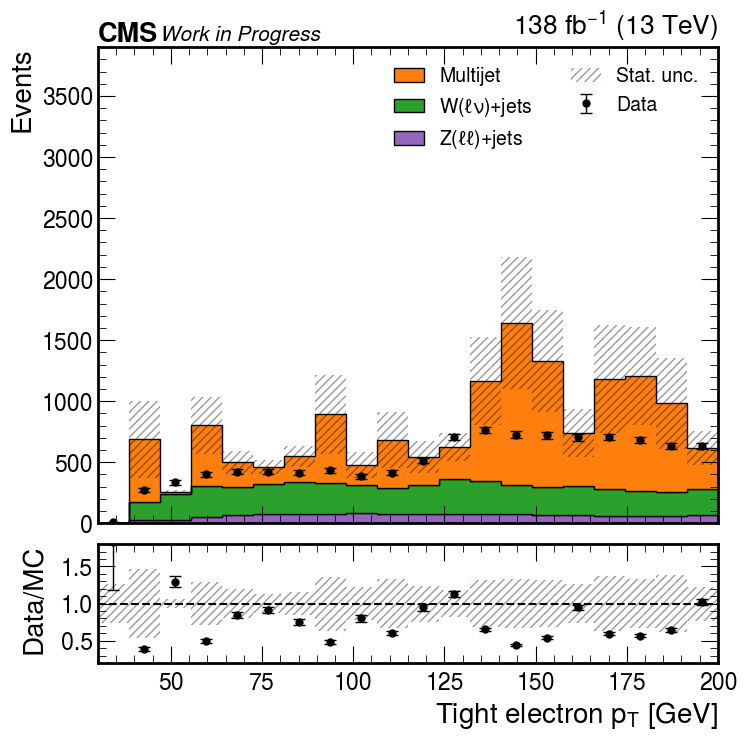

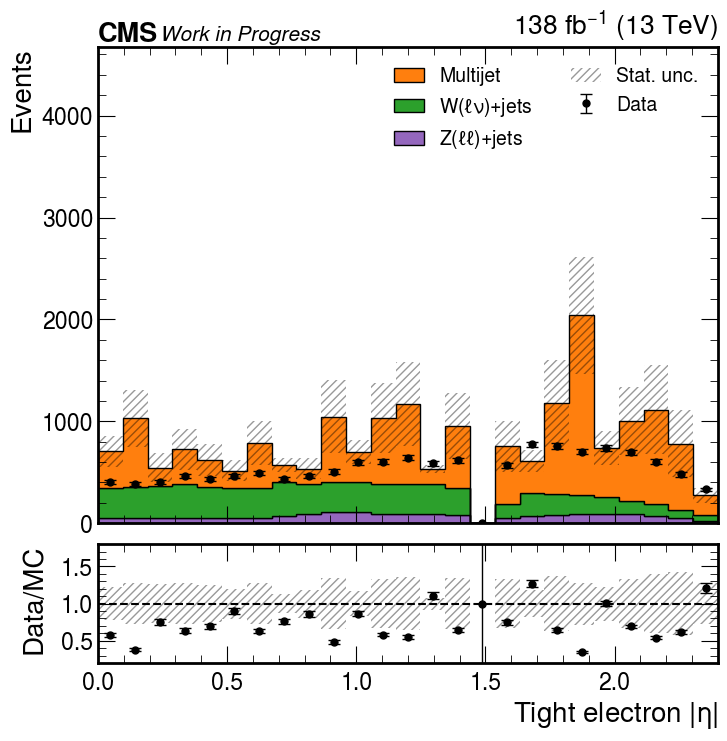

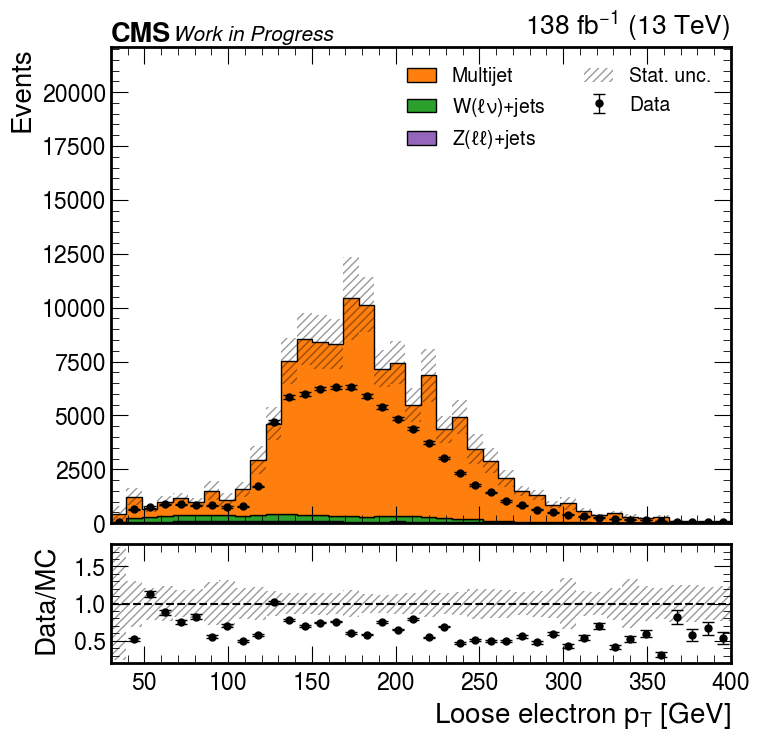

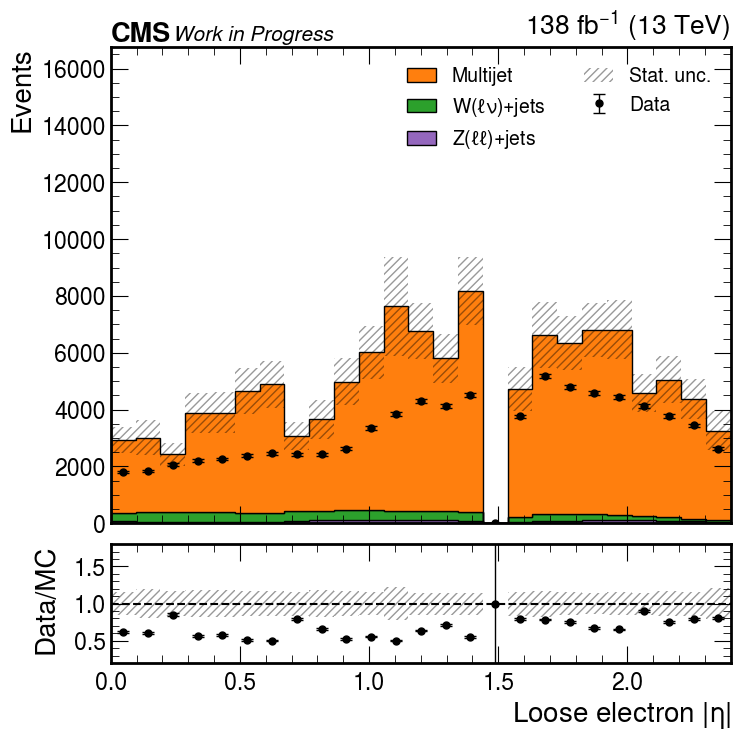

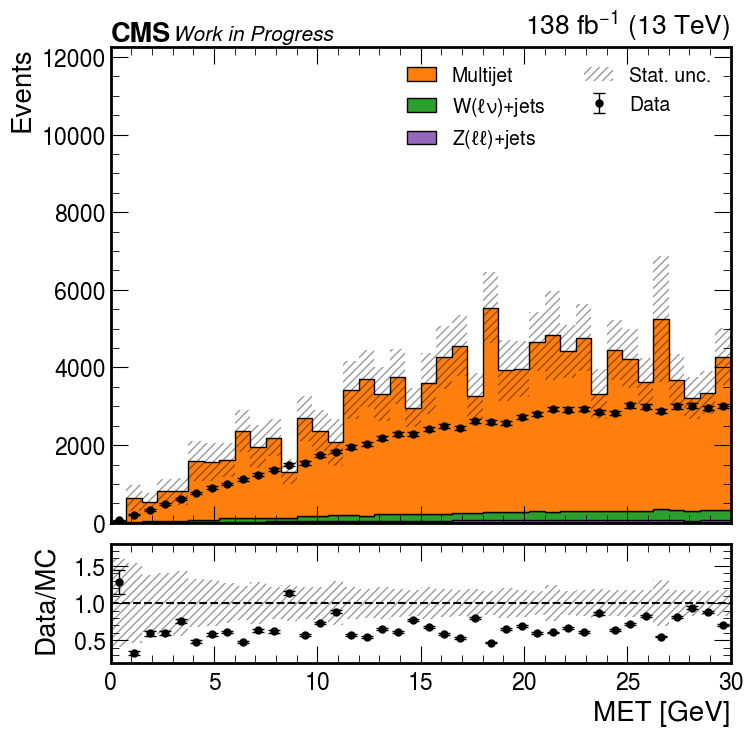

In [216]:
plt.rcParams.update({"font.size": 20})
add_data = True
add_soverb = False
    
from utils import plot_hists as plot_hists

if len(years)>1:
    PATH = f"/Users/fmokhtar/Desktop/AN_2024/fakes/{ch}_Run2"
else:
    PATH = f"/Users/fmokhtar/Desktop/AN_2024/fakes/{ch}_{year}"

if not os.path.exists(PATH):
    # Create the directory
    os.makedirs(PATH)    

plot_hists(hists, years, channels, vars_to_plot,             
            add_data=add_data,
            logy=False,
            add_soverb=add_soverb,
            only_sig=False,
            mult=1,
            outpath=PATH,
#             text_=text_,
#             text_=region + f"\n {list(categories_sel.keys())[0]} category",
#             text_=region + f"\n category: {list(categories_sel.keys())[0]} \n Applying qcd event_weight<{threshold}",
#             text_=region + f"\n Applying qcd event_weight<{threshold}",

            blind_region=False,
#            save_as=f"{years[0]}_{channels[0]}"
#            save_as=f"{ch}"
           
          )

In [193]:
def set_im_title(year, ch, region):
    if region != "SF":
        region += " rate"
    if ch == "ele":
        return f"Electron {region} {year}"
    else:
        return f"Muon {region} {year}"
    
def plot_matrix(M, region, channels, num=False, den=False):
    for ch in channels:
        fig, ax = plt.subplots(figsize=(8,8))

        if (num is False) and (den==False):
            im = ax.imshow(M[ch], vmax=1, vmin=0)#, cmap='hot', interpolation='nearest')
        else:
            im = ax.imshow(M[ch], vmin=0)#, cmap='hot', interpolation='nearest')

        ax.set_xticks(ticks=np.arange(-0.5, (len(etabinning)-1), 1), labels=np.round(etabinning,2))
        ax.set_yticks(ticks=np.arange(-0.5, (len(ptbinning[ch])-1), 1), labels=np.round(ptbinning[ch],2))

        ax.tick_params(axis='x', which='major', pad=8)
        ax.tick_params(axis='y', which='major', pad=8)

        # Loop over data dimensions and create text annotations.
        for i in range(len(ptbinning[ch])-1):
            for j in range(len(etabinning)-1):
                text = ax.text(j, i, np.round(M[ch][i, j],2), ha="center", va="center")#, color="w")

        ax.set_xlabel(r"$\eta$")            
        ax.set_ylabel(r"$p_T$")
        
        plt.colorbar(im, shrink=0.8)
        plt.tight_layout()
        
        if num:
            ax.set_title(f"{ch} {year}: " + r"$tight_{Data}$", pad=20)
            if region=="SF":
                ax.set_title(f"{ch} {year}: " + r"$loose_{Data}$", pad=20)
            plt.savefig(f"{PATH}/{year}_{ch}_{region}_num.pdf")            
        elif den:
            ax.set_title(f"{ch} {year}: " + r"$loose_{Data}$", pad=20)            
            if region=="SF":
                ax.set_title(f"{ch} {year}: " + r"$loose_{DY}$", pad=20)            
            plt.savefig(f"{PATH}/{year}_{ch}_{region}_den.pdf")            
        else:
            ax.set_title(set_im_title(year,ch,region), pad=20)
            plt.savefig(f"{PATH}/{year}_{ch}_{region}.pdf")    
            
PATH = f"/Users/fmokhtar/Desktop/AN_2024/fakes/"            

# Fake rate extraction

In [194]:
years

['2016', '2016APV', '2017', '2018']

In [195]:
channels = [
    "ele",
#     "mu"
]

ptbinning = {}
ptbinning["ele"] = [2000, 200, 160, 120, 90, 60, 30]
ptbinning["mu"] = [2000, 120, 90, 60, 30]

etabinning = [0, 0.5, 1, 1.5, 2, 2.5]

FR = {}
for year in years:
    FR[year] = {}
    for ch in channels:
        FR[year][ch] = np.zeros((len(ptbinning[ch])-1,len(etabinning)-1))
        print(year, ch, FR[year][ch].shape)

2016 ele (6, 5)
2016APV ele (6, 5)
2017 ele (6, 5)
2018 ele (6, 5)


In [196]:
for year in years:
    for ch in channels:
        print(f"{year}, {ch} channel:")    

        df = events_dict[year][ch]

        for i in range(len(ptbinning[ch])-1):
            high_pt = ptbinning[ch][i]
            low_pt = ptbinning[ch][i+1]

            msk_pt = (df["Data"]["loose_lep1_pt"] >= low_pt) & (df["Data"]["loose_lep1_pt"] < high_pt)
            msk_pt_wjets = (df["WJetsLNu"]["loose_lep1_pt"] >= low_pt) & (df["WJetsLNu"]["loose_lep1_pt"] < high_pt)
            msk_pt_dyjets = (df["DYJets"]["loose_lep1_pt"] >= low_pt) & (df["DYJets"]["loose_lep1_pt"] < high_pt)

            print(f"   ptbin ({low_pt:.2f}, {high_pt:.2f})")

            for j in range(len(etabinning)-1):        

                low_eta = etabinning[j]
                high_eta = etabinning[j+1]

                # get data tight/loose ratio                
                msk_eta = (abs(df["Data"]["loose_lep1_eta"]) >= low_eta) & (abs(df["Data"]["loose_lep1_eta"]) < high_eta)
                msk_Nt1 = df["Data"]["N_tight_lep"]==1
                msk_Nt0 = df["Data"]["N_loose_lep"]==1

                tight = len(df["Data"][msk_Nt1 & msk_pt & msk_eta])
                loose = len(df["Data"][msk_Nt0 & msk_pt & msk_eta])            

                # get the EWK corr WJets
                msk_eta_wjets = (abs(df["WJetsLNu"]["loose_lep1_eta"]) >= low_eta) & (abs(df["WJetsLNu"]["loose_lep1_eta"]) < high_eta)
                msk_Nt1_wjets = df["WJetsLNu"]["N_tight_lep"]==1      
                msk_Nt0_wjets = df["WJetsLNu"]["N_loose_lep"]==1

                tight_wjets = df["WJetsLNu"]["event_weight"][msk_Nt1_wjets & msk_pt_wjets & msk_eta_wjets].sum()
                loose_wjets = df["WJetsLNu"]["event_weight"][msk_Nt0_wjets & msk_pt_wjets & msk_eta_wjets].sum()

                # get the EWK corr dyjets
                msk_eta_dyjets = (abs(df["DYJets"]["loose_lep1_eta"]) >= low_eta) & (abs(df["DYJets"]["loose_lep1_eta"]) < high_eta)
                msk_Nt1_dyjets = df["DYJets"]["N_tight_lep"]==1      
                msk_Nt0_dyjets = df["DYJets"]["N_loose_lep"]==1

                tight_dyjets = df["DYJets"]["event_weight"][msk_Nt1_dyjets & msk_pt_dyjets & msk_eta_dyjets].sum()
                loose_dyjets = df["DYJets"]["event_weight"][msk_Nt0_dyjets & msk_pt_dyjets & msk_eta_dyjets].sum()

                # get the SF                
                SF = 1
                FR[year][ch][i,j] = (tight - SF*(tight_wjets+tight_dyjets))/(loose-SF*(loose_wjets+loose_dyjets))

        print("----------------------------")

2016, ele channel:
   ptbin (200.00, 2000.00)
   ptbin (160.00, 200.00)
   ptbin (120.00, 160.00)
   ptbin (90.00, 120.00)
   ptbin (60.00, 90.00)
   ptbin (30.00, 60.00)
----------------------------
2016APV, ele channel:
   ptbin (200.00, 2000.00)
   ptbin (160.00, 200.00)
   ptbin (120.00, 160.00)
   ptbin (90.00, 120.00)
   ptbin (60.00, 90.00)
   ptbin (30.00, 60.00)
----------------------------
2017, ele channel:
   ptbin (200.00, 2000.00)
   ptbin (160.00, 200.00)
   ptbin (120.00, 160.00)
   ptbin (90.00, 120.00)
   ptbin (60.00, 90.00)
   ptbin (30.00, 60.00)
----------------------------
2018, ele channel:
   ptbin (200.00, 2000.00)
   ptbin (160.00, 200.00)
   ptbin (120.00, 160.00)
   ptbin (90.00, 120.00)
   ptbin (60.00, 90.00)
   ptbin (30.00, 60.00)
----------------------------


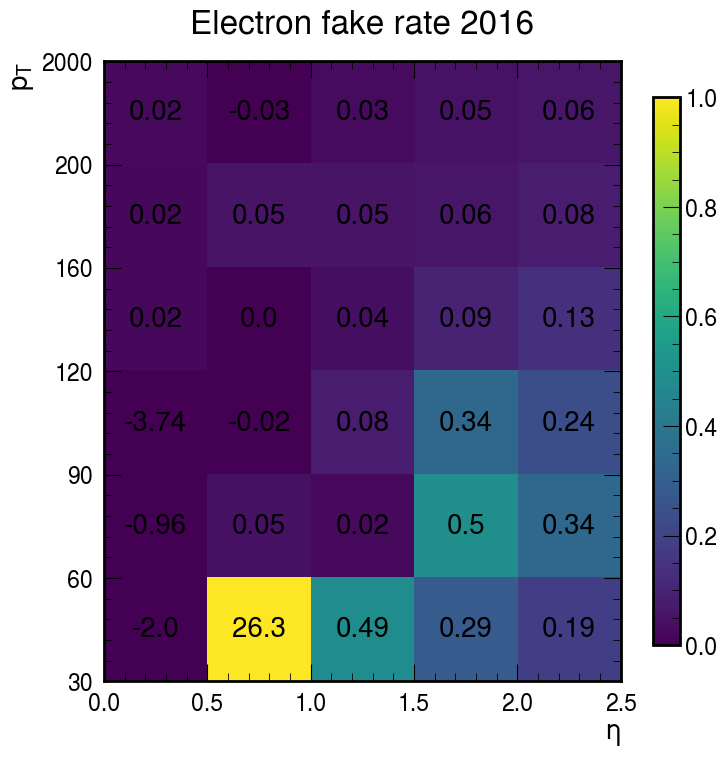

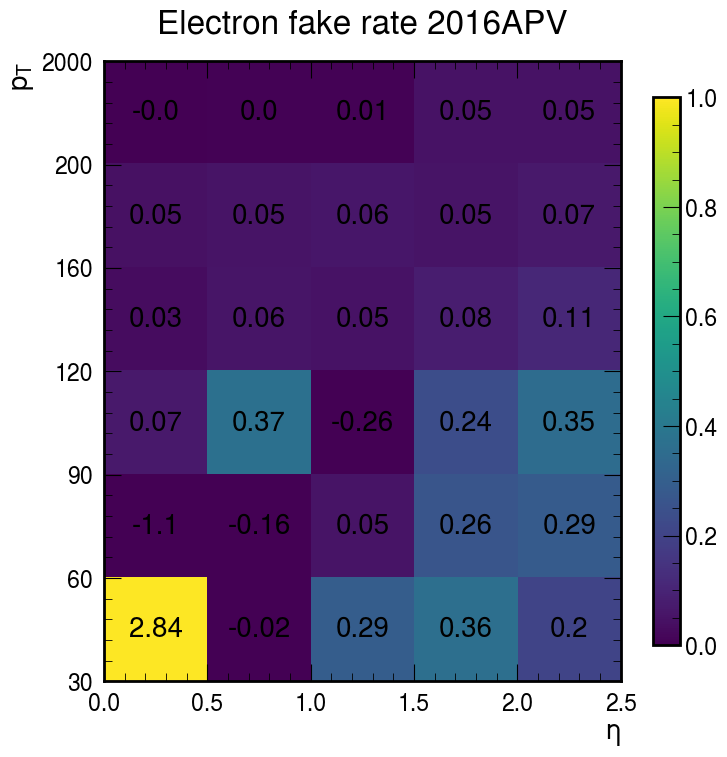

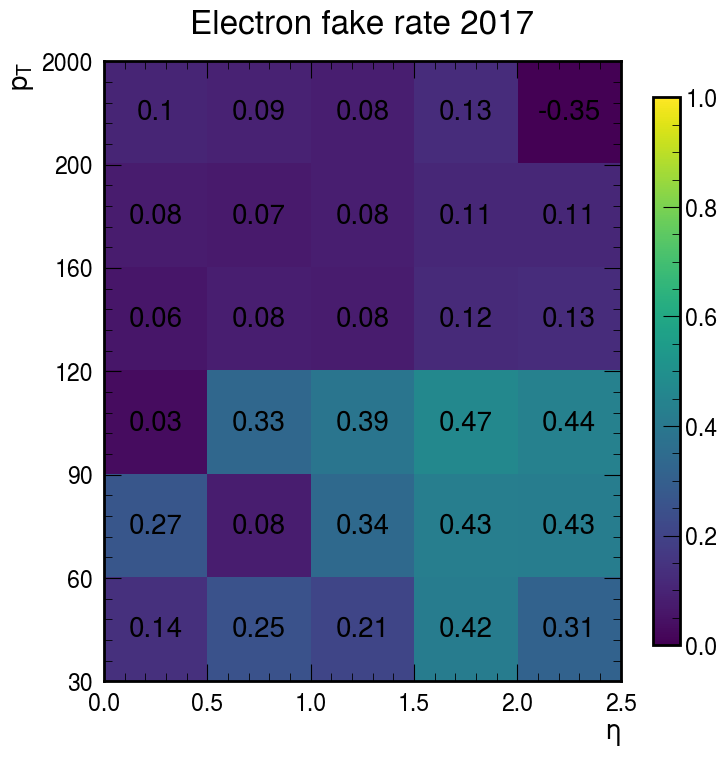

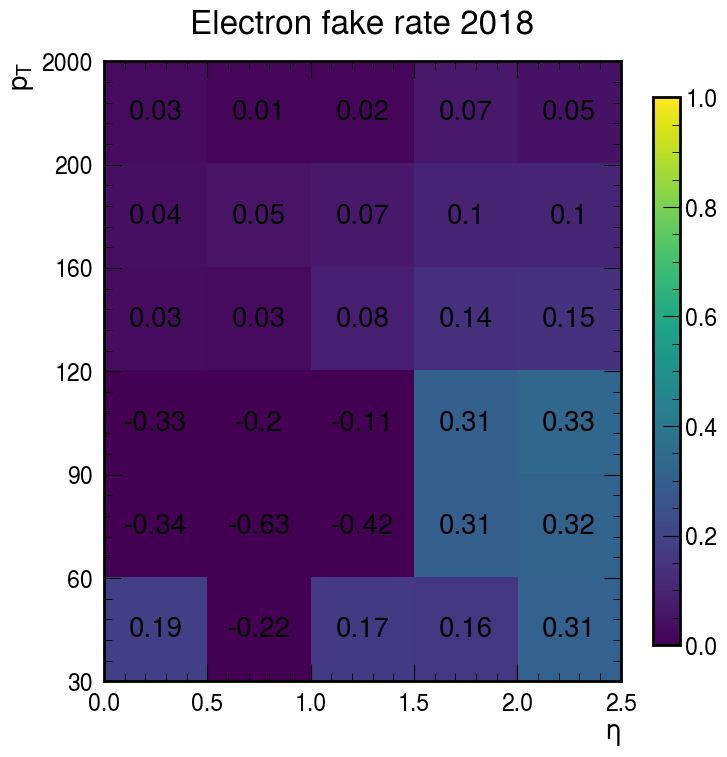

In [197]:
# plot_matrix(FR, region, channels, num=True)
# plot_matrix(FR, region, channels, den=True)
for year in years:
    plot_matrix(FR[year], region, channels)

# Get fake contribution from FR

In [23]:
import scipy
def get_finetuned_score(data, model_path):
    import onnx
    import onnxruntime as ort

    input_dict = {
        "highlevel": data.loc[:, "fj_ParT_hidNeuron000":"fj_ParT_hidNeuron127"].values.astype("float32"),
    }

    onnx_model = onnx.load(model_path)
    onnx.checker.check_model(onnx_model)

    ort_sess = ort.InferenceSession(
        model_path,
        providers=["AzureExecutionProvider"],
    )
    outputs = ort_sess.run(None, input_dict)

    return scipy.special.softmax(outputs[0], axis=1)[:, 0]

In [141]:
! ls /Users/fmokhtar/projects/boostedhiggs/eos/May31_hww_uselooselep_2017/

SingleElectron_Run2017B SingleElectron_Run2017D SingleElectron_Run2017F
SingleElectron_Run2017C SingleElectron_Run2017E


In [32]:
PR = 0.95

for year in years:
    indir = f"/Users/fmokhtar/projects/boostedhiggs/eos/May31_hww_uselooselep_{year}"
    outdir = f"/Users/fmokhtar/projects/boostedhiggs/eos/May31_hww_{year}"
    
    ch = "ele"

    print(f"{year}, {ch} channel:")
    if ch == "ele":
        if year == "2018":
            l = glob.glob(f"{indir}/EGamma*/outfiles/*_{ch}.parquet")
        else:
            l = glob.glob(f"{indir}/SingleElectron*/outfiles/*_{ch}.parquet")

    else:
        l = glob.glob(f"{indir}/SingleMuon*/outfiles/*_{ch}.parquet")
    data = pd.read_parquet(l)

    data["THWW"] = get_finetuned_score(data, "../../weaver-core-dev/experiments_finetuning/v35_30/model.onnx")

    if ch == "ele":
        Nt0 = (data["n_tight_electrons"]==0)
        Nt1 = (data["n_tight_electrons"]==1)
    else:
        Nt0 = (data["n_tight_muons"]==0)
        Nt1 = (data["n_tight_muons"]==1)

    data["event_weight"] = 1

    for i in range(len(ptbinning[ch])-1):
        high_pt = ptbinning[ch][i]
        low_pt = ptbinning[ch][i+1]

        msk_pt = (data["lep_pt"] >= low_pt) & (data["lep_pt"] < high_pt)

        for j in range(len(etabinning)-1):
            low_eta = etabinning[j]
            high_eta = etabinning[j+1]

            msk_eta = (abs(data["lep_eta"]) >= low_eta) & (abs(data["lep_eta"]) < high_eta)

            data["event_weight"][msk_pt & msk_eta & Nt0] = (PR * FR[year][ch][i,j]) / (PR - FR[year][ch][i,j])
            data["event_weight"][msk_pt & msk_eta & Nt1] = (FR[year][ch][i,j] * (PR-1)) / (PR - FR[year][ch][i,j])   

    data.to_parquet(f"{outdir}/fake_{year}_{ch}.parquet")

2016, ele channel:


/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_68035/894809211.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.025383847038315924' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data["event_weight"][msk_pt & msk_eta & Nt0] = (PR * FR[year][ch][i,j]) / (PR - FR[year][ch][i,j])


2016APV, ele channel:


/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_68035/894809211.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.0027454323879283564' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data["event_weight"][msk_pt & msk_eta & Nt0] = (PR * FR[year][ch][i,j]) / (PR - FR[year][ch][i,j])


2017, ele channel:


/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_68035/894809211.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.11428095784845645' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data["event_weight"][msk_pt & msk_eta & Nt0] = (PR * FR[year][ch][i,j]) / (PR - FR[year][ch][i,j])


2018, ele channel:


/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_68035/894809211.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.031966186735605945' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data["event_weight"][msk_pt & msk_eta & Nt0] = (PR * FR[year][ch][i,j]) / (PR - FR[year][ch][i,j])
